<a href="https://colab.research.google.com/github/anilbhatt1/Skunkworks_Mediapipe_Jitter/blob/main/mediapipe_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usage example of MediaPipe Pose Solution API in Python (see also http://solutions.mediapipe.dev/pose).

In [ ]:
# Minimum dependency for MediaPipe Solutions Python API is opencv-python
!pip install opencv-python~=3.4.11
!pip install mediapipe

Upload any image that that has a person with visible upper body to the Colab. We took an example from the web: https://www.latimes.com/sports/soccer/story/2020-08-25/lionel-messi-informs-fc-barcelona-he-wants-to-leave-team


In [ ]:
from google.colab import files

uploaded = files.upload()

pose.jpg


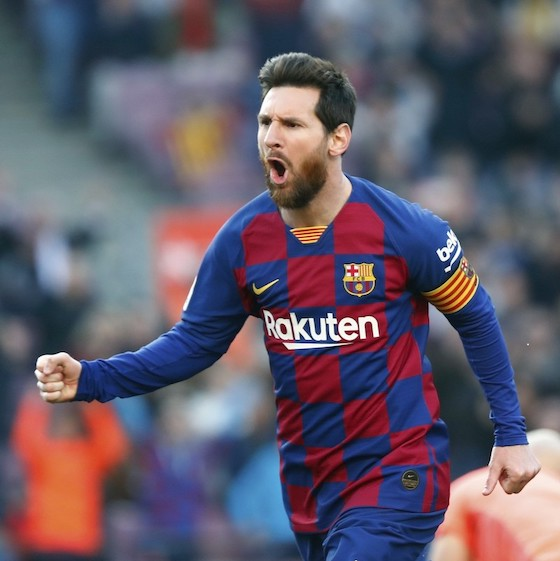

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Preview the images.
for name, image in images.items():
  print(name)   
  cv2_imshow(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Pose solution, we can access this module as `mp_pose = mp.solutions.pose`.

You may change the parameters, such as `static_image_mode` and `min_detection_confidence`, during the initialization. Run `help(mp_pose.Pose)` to get more informations about the parameters.

In [ ]:
import mediapipe as mp
mp_pose = mp.solutions.pose

help(mp_pose.Pose)

# Initialize MediaPipe Pose.
pose = mp_pose.Pose(
    static_image_mode=True, min_detection_confidence=0.5)

Help on class Pose in module mediapipe.python.solutions.pose:

class Pose(mediapipe.python.solution_base.SolutionBase)
 |  MediaPipe Pose.
 |  
 |  MediaPipe Pose processes an RGB image and returns pose landmarks on the most
 |  prominent person detected.
 |  
 |  Usage examples:
 |    import cv2
 |    import mediapipe as mp
 |    mp_drawing = mp.solutions.drawing_utils
 |    mp_pose = mp.solutions.pose
 |  
 |    # For static images:
 |    pose = mp_pose.Pose(
 |        static_image_mode=True, min_detection_confidence=0.5)
 |    for idx, file in enumerate(file_list):
 |      image = cv2.imread(file)
 |      # Convert the BGR image to RGB before processing.
 |      results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
 |  
 |      # Print and draw pose landmarks on the image.
 |      print(
 |          'nose landmark:',
 |           results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE])
 |      annotated_image = image.copy()
 |      mp_drawing.draw_landmarks(
 |          

Nose landmark:
x: 0.48000144958496094
y: 0.2681480050086975
z: 0.0014891722239553928
visibility: 11.301165580749512
presence: 0.0

Pose landmarks of pose.jpg:


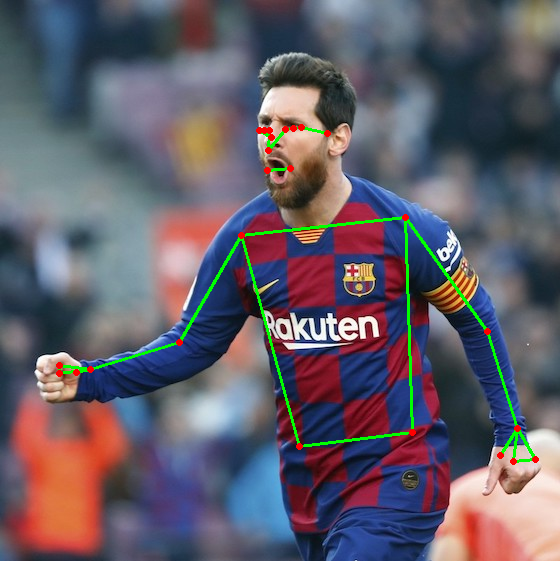

In [ ]:
mp_drawing = mp.solutions.drawing_utils 
for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # Print nose landmark.
  print('Nose landmark:'),
  print(results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE])

  # Draw pose landmarks.
  print(f'Pose landmarks of {name}:')
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_pose.POSE_CONNECTIONS)
  cv2_imshow(annotated_image)